<center><h1 style="color:#1a1a1a;
                    font-size:3em">
        Projet: 🤖 Méthodologies de l’IA 
        </h1> 
        <h2 style="color:#1a1a1a;
                    font-size:2em">
        Utilisation des réseaux multi-couches pour l’analyse des 😞 sentiments 😄.
       </h2>
</center>

<p style="font-size:2em">📜 Table des matières:</p>
<div style="font-size:1.5em">
    <ul>
       <li>
          <a href="#Intro-section">Introduction 📖</a>
          <ul>
             <li><a href="#overview">Aperçu</a></li>
             <li><a href="#dataset">Jeu de données</a></li>
          </ul>
       </li>
       <li>
          <a href="#Analysis-section">Analyses et Transformations 🔎</a>
          <ul>
             <li><a href="#eda">Exploration de données</a></li>
             <li><a href="#trans">Transformation de données</a></li>
          </ul>
       </li>
       <li>
          <a href="#pre-processing">Pré-traitement ⚙️</a>
          <ul>
             <li><a href="#split-data">Diviser les données</a></li>
             <li><a href="#Vectorising">Vectoriser les phrases</a></li>
          </ul>
       </li>
       <li>
          <a href="#model-building">Construction des modèles 🛠️</a>
          <ul>
             <li><a href="#ml-basic">Modèles de base du ML </a></li>
             <li><a href="#ANN">Réseaux de neurones artificiels (ANN)</a></li>
             <li><a href="#word-embd">Word Embedding</a></li>
             <li><a href="#cnn">Réseau de Neurones convolutifs (CNN) avec Embedding</a></li>
          </ul>
       </li>
       <li><a href="#demo">Une démo live 🧮</a></li>
       <li><a href="#Conclusion">Conclusion 📌</a></li>
    </ul>
</div>

<center id="Intro-section">
        <h1 style="color:#1a1a1a;
                    font-size:2em">
        Introduction 📖
        </h1>
</center>

<div id="overview">
        <h1 style="color:#1a1a1a">
         ⮞  Aperçu
        </h1>
</div>

<span style="color:grey; font-size:1.2em">Dans le cadre de notre etude Ce projet qui vise a Utilisation des <b>réseaux multi-couches</b> pour l’analyse des <b>sentiments</b> des phrases issues d’une base d’exemples qui contient des phrases étiquetées avec un sentiment positif ou négatif.
</span>

<div id="dataset">
        <h1 style="color:#1a1a1a">
         ⮞  Jeu de données
        </h1>
</div>


<span style="color:grey; font-size:1.2em"> Notre jeu de données a été créé pour l'article <b><a href="https://dl.acm.org/doi/10.1145/2783258.2783380">From Group to Individual Labels using Deep Features</a></b>.. Il contient des phrases étiquetées avec un sentiment positif ou négatif.<br><br>
<b>Format : score de la phrase / Détails</b>
<br>
Le score est soit 1 (pour positif) soit 0 (pour négatif)
Les phrases proviennent de trois sites Web/domaines différents :<br>
* [imdb](http://imdb.com)<br>
* [amazon](http://amazon.com)<br>
* [yelp](http://yelp.com)
</span>

<center id="Analysis-section">
        <h1 style="color:#1a1a1a;
                    font-size:2em">
        Analyses et Transformations 🔎
        </h1>
</center>

<div id="eda">
        <h1 style="color:#1a1a1a">
         ⮞  Exploration de données
        </h1>
</div>

<h4 style="color:grey"> Importation de bibliothèques </h4>

In [1]:
# importer les bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Modèles de apprentissage automatique par sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [2]:
#  ignorer les avertissements
import warnings

warnings.filterwarnings("ignore")

<span style="color:grey; font-size:1.2em">Important nos jeu de données sous les fichier <b>amazon_cells_labelled.txt</b> content les , <b>imdb_labelled.txt</b> et <b>yelp_labelled.txt</b> content  <b>csv</b>.</span>

In [3]:
# Dataset d'amazon
amazon_data = pd.read_csv("../input/sentiment-labelled-sentences-data-set/sentiment labelled sentences/amazon_cells_labelled.txt",delimiter='\t',header=None, names=["text","sentiment"])

# Dataset d'imdb
imdb_data = pd.read_csv("../input/sentiment-labelled-sentences-data-set/sentiment labelled sentences/imdb_labelled.txt",delimiter='\t',header=None, names=["text","sentiment"])

# Dataset de yeld
yelp_data = pd.read_csv("../input/sentiment-labelled-sentences-data-set/sentiment labelled sentences/yelp_labelled.txt",delimiter='\t',header=None, names=["text","sentiment"])

Datasets = {"amazon":amazon_data,"imdb":imdb_data,"yelp":yelp_data}

<h4 style="color:grey"> Explorant notre jeu de données </h4>

In [4]:
amazon_data.head()

,text,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [5]:
imdb_data.head()

,text,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [6]:
yelp_data.head()

,text,sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [7]:
for dataset in Datasets:
    print("la taille du dataset "+str(dataset)+" est: "+str(Datasets[dataset].shape[0]))


la taille du dataset amazon est: 1000
la taille du dataset imdb est: 748
la taille du dataset yelp est: 1000


<span style="color:grey; font-size:1.2em">Un aperçu des données en utilisant les fonctions <b>info()</b> et <b>describe()</b> du pandas pour examiner les données. </span>

In [8]:
for dataset in Datasets.keys():
    print("\n Les info sur le dataset "+str(dataset)+": \n")
    print(Datasets[dataset].info())


 Les info sur le dataset amazon: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       1000 non-null   object
 1   sentiment  1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB
None

 Les info sur le dataset imdb: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       748 non-null    object
 1   sentiment  748 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.8+ KB
None

 Les info sur le dataset yelp: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       1000 non-null   object
 1   sentiment  1000 non-null   int64 
dt

In [9]:
for dataset in Datasets.keys():
    print("\n Une description sur du dataset "+str(dataset)+": \n")
    print(Datasets[dataset].describe())


 Une description sur du dataset amazon: 

        sentiment
count  1000.00000
mean      0.50000
std       0.50025
min       0.00000
25%       0.00000
50%       0.50000
75%       1.00000
max       1.00000

 Une description sur du dataset imdb: 

        sentiment
count  748.000000
mean     0.516043
std      0.500077
min      0.000000
25%      0.000000
50%      1.000000
75%      1.000000
max      1.000000

 Une description sur du dataset yelp: 

        sentiment
count  1000.00000
mean      0.50000
std       0.50025
min       0.00000
25%       0.00000
50%       0.50000
75%       1.00000
max       1.00000


In [10]:
for dataset in Datasets.keys():
    print("\n Les valeurs null du dataset "+str(dataset)+" est: ")
    print(Datasets[dataset].isna().sum())


 Les valeurs null du dataset amazon est: 
text         0
sentiment    0
dtype: int64

 Les valeurs null du dataset imdb est: 
text         0
sentiment    0
dtype: int64

 Les valeurs null du dataset yelp est: 
text         0
sentiment    0
dtype: int64


<span style="color:grey; font-size:1.2em">Les données n'ont pas de <b>valeurs manquantes</b>, nous n'effectuerons donc pas un <b>nettoyage des données.</b> </span>

<div id="trans">
        <h1 style="color:#1a1a1a">
         ⮞  Transformation de données
        </h1>
</div>

<span style="color:grey; font-size:1.2em">On va créer un objet de type <b>pandas DataFrame</b> qui contient les données des trois Datasets.</span>

In [11]:
amazon_data['source']='amazon'
imdb_data['source']='imdb'
yelp_data['source']='yelp'

data  = pd.concat(list(Datasets.values()))

In [12]:
data.head()

,text,sentiment,source
0,So there is no way for me to plug it in here i...,0,amazon
1,"Good case, Excellent value.",1,amazon
2,Great for the jawbone.,1,amazon
3,Tied to charger for conversations lasting more...,0,amazon
4,The mic is great.,1,amazon


<span style="color:grey; font-size:1.2em">Analyons donc le nouveau jeu de données.</span>

In [13]:
print("la taille du nouveau dataset est: "+str(data.shape[0]))

la taille du nouveau dataset est: 2748


In [14]:
print("Une description sur du nouveau dataset:")
data.describe()

Une description sur du nouveau dataset:


,sentiment
count,2748.000000
mean,0.504367
std,0.500072
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


le pourcentage de chaque source:


<AxesSubplot:ylabel='source'>

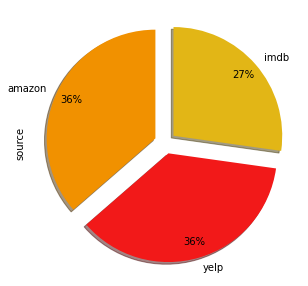

In [15]:
print("le pourcentage de chaque source:")
data['source'].value_counts().plot(kind='pie', 
                                   autopct='%1.0f%%',
                                   shadow=True, 
                                   startangle=90, 
                                   pctdistance=0.85,
                                   explode = (0.1,0.1,0.1),
                                   colors = ['#f19100','#f21919','#e2b616'],
                                   figsize=(5, 5))

le pourcentage des types de sentiments:


<AxesSubplot:ylabel='sentiment'>

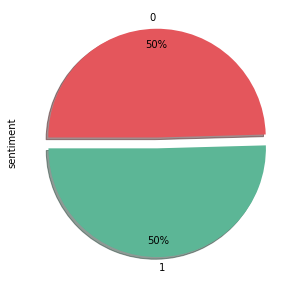

In [16]:
print("le pourcentage des types de sentiments:")
data.sentiment.value_counts().plot(kind='pie', 
                                   autopct='%1.0f%%',
                                   shadow=True, 
                                   startangle=180, 
                                   pctdistance=0.85,
                                   explode = (0.05,0.05),
                                   colors = ['#5cb696','#e4565c'],
                                   figsize=(5, 5))

<span style="color:grey; font-size:1.2em">Cet ensemble de données a <b>50/50</b> sentiments positifs et négatifs représentés par <b>1 et 0 </b>respectivement.</span>

<center id="pre-processing">
        <h1 style="color:#1a1a1a;
                    font-size:2em">
        Pré-traitement ⚙️
        </h1>
</center>

<div id="split-data">
        <h1 style="color:#1a1a1a">
         ⮞  Diviser les données
        </h1>
</div>



<span style="color:grey; font-size:1.2em">Nous commençons par diviser notre jeu de données <b>75%</b> pour l'entraînement et <b>25%</b> pour le test.</span>


In [17]:
sentences = data['text'].values
y = data['sentiment'].values

# diviser les données
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, 
                                                                    test_size=0.25, 
                                                                    random_state=1000, 
                                                                    shuffle=True)

le pourcentage des types de sentiments pour les donnees d'entraînement:


<AxesSubplot:ylabel='sentiment'>

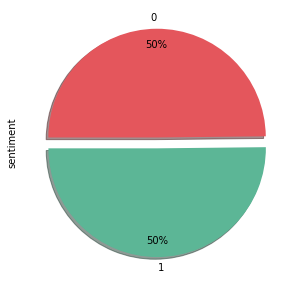

In [18]:
train_sentences = np.array(sentences_train)
train_labels = np.array(y_train)
train = pd.DataFrame({'sentiment': train_labels, 'text': list(train_sentences)}, columns=['sentiment', 'text'])

print("le pourcentage des types de sentiments pour les donnees d'entraînement:")
train.sentiment.value_counts().plot(kind='pie', 
                                   autopct='%1.0f%%',
                                   shadow=True, 
                                   startangle=180, 
                                   pctdistance=0.85,
                                   explode = (0.05,0.05),
                                   colors = ['#5cb696','#e4565c'],
                                   figsize=(5, 5))

<span style="color:grey; font-size:1.2em">L'échantillon de données d'apprentissage représente très bien l'ensemble de données</span>

<div id="Vectorising">
        <h1 style="color:#1a1a1a">
         ⮞  Vectoriser les phrases
        </h1>
</div>

<span style="color:grey; font-size:1.2em">D'aboard on doit créer un vocabulaire de tous les mots uniques dans les phrases. Pour cela on va utiliser `CountVectorizer` fourni par la bibliothèque `scikit-learn` pour vectoriser les phrases. Ce vocabulaire peut ensuite être utilisé pour créer un vecteur de caractéristiques du nombre de mots.<br> pour mieux comprendre prenant un example issue de notre jeu de données:</span>

In [19]:
sample_text = data['text'][:3]
for text in sample_text: print(text)

So there is no way for me to plug it in here in the US unless I go by a converter.
Good case, Excellent value.
Great for the jawbone.


In [20]:
vectorizer = CountVectorizer(min_df=0, lowercase=False)
vectorizer.fit(sample_text)
vectorizer.vocabulary_

{'So': 3,
 'there': 19,
 'is': 12,
 'no': 16,
 'way': 23,
 'for': 8,
 'me': 15,
 'to': 20,
 'plug': 17,
 'it': 13,
 'in': 11,
 'here': 10,
 'the': 18,
 'US': 4,
 'unless': 21,
 'go': 9,
 'by': 5,
 'converter': 7,
 'Good': 1,
 'case': 6,
 'Excellent': 0,
 'value': 22,
 'Great': 2,
 'jawbone': 14}

In [21]:
vectorizer.transform(sample_text).toarray()

array([[0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        0, 1],
       [1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
        0, 0]])

<span style="color:grey; font-size:1.2em">Créez les vecteurs de caractéristiques pour chaque phrase de l'ensemble d'entraînement et de test :</span>


In [22]:
vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)

In [23]:
print("le format final de nos données d'entraînement est:\n\n",X_train)

le format final de nos données d'entraînement est:

   (0, 185)	1
  (0, 340)	1
  (0, 358)	1
  (0, 1359)	1
  (0, 2050)	1
  (0, 3780)	1
  (1, 131)	1
  (1, 187)	1
  (1, 550)	1
  (1, 1427)	1
  (1, 1543)	1
  (1, 1656)	1
  (1, 2050)	1
  (1, 2489)	1
  (1, 2530)	1
  (1, 2763)	1
  (1, 4163)	1
  (1, 4189)	1
  (2, 101)	1
  (2, 187)	1
  (2, 258)	1
  (2, 373)	1
  (2, 504)	1
  (2, 951)	1
  (2, 1324)	1
  :	:
  (2060, 1401)	1
  (2060, 1474)	1
  (2060, 1546)	1
  (2060, 1638)	1
  (2060, 1793)	1
  (2060, 1845)	1
  (2060, 1900)	1
  (2060, 2024)	1
  (2060, 2055)	1
  (2060, 2069)	1
  (2060, 2293)	1
  (2060, 2314)	1
  (2060, 2355)	1
  (2060, 2444)	1
  (2060, 2449)	1
  (2060, 2450)	1
  (2060, 2467)	1
  (2060, 2586)	1
  (2060, 2640)	2
  (2060, 3511)	1
  (2060, 3730)	1
  (2060, 3759)	2
  (2060, 3825)	1
  (2060, 4169)	1
  (2060, 4207)	1


<center id="model-building">
        <h1 style="color:#1a1a1a;
                    font-size:2em">
        Construction des modèles 🛠️
        </h1>
</center>

<div id="ml-basic">
        <h1 style="color:#1a1a1a">
         ⮞  Modèles de base du ML  
        </h1>
</div>


In [24]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)

print("Accuracy: {:.2f} %".format(score*100))

Accuracy: 75.98 %


<span style="color:grey; font-size:1.2em">On remarque que le DecisionTreeClassifier a atteint un impressionnant 74.36 %, mais regardons comment ce modèle fonctionne sur les autres ensembles de données dont nous disposons. Dans ce script, nous effectuons et évaluons un ensemble des modèles pour chaque ensemble de données:</span>

In [25]:
def prediction(model_name):
    for dataframe in Datasets.values():
        Sentences = dataframe['text'].values
        Y = dataframe['sentiment'].values

        Sentences_train, Sentences_test, Y_train, Y_test = train_test_split(
            Sentences, Y, test_size=0.25, random_state=1000)

        vectorizer = CountVectorizer(stop_words='english')
        vectorizer.fit(sentences_train)
        x_train = vectorizer.transform(Sentences_train)
        x_test  = vectorizer.transform(Sentences_test)

        model = models[model_name]
        model.fit(x_train, Y_train)
        score = model.score(x_test, Y_test)
        print('Accuracy for {} data with {} model is: {:.2f} %'.format(dataframe['source'][0],model_name, (score*100)))
    print('\n'+('-'*70)+'\n')

In [26]:
models = {"Logistic Regression": LogisticRegression(),
          "Support Vector Machine": SVC(),
          "Decision Tree": DecisionTreeClassifier(),
          "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, max_depth=100, random_state=5000),
          "Random Forest": RandomForestClassifier(max_depth=200, random_state=1000)
         }

for model in models: prediction(model)

Accuracy for amazon data with Logistic Regression model is: 77.20 %
Accuracy for imdb data with Logistic Regression model is: 75.94 %
Accuracy for yelp data with Logistic Regression model is: 75.60 %

----------------------------------------------------------------------

Accuracy for amazon data with Support Vector Machine model is: 74.40 %
Accuracy for imdb data with Support Vector Machine model is: 72.19 %
Accuracy for yelp data with Support Vector Machine model is: 75.60 %

----------------------------------------------------------------------

Accuracy for amazon data with Decision Tree model is: 67.20 %
Accuracy for imdb data with Decision Tree model is: 68.45 %
Accuracy for yelp data with Decision Tree model is: 72.40 %

----------------------------------------------------------------------

Accuracy for amazon data with Gradient Boosting model is: 69.60 %
Accuracy for imdb data with Gradient Boosting model is: 70.05 %
Accuracy for yelp data with Gradient Boosting model is: 73.2

<span style="color:grey; font-size:1.2em">Comme on peut le voir, les approches ml de base obtiennent des résultats respectables, mais nous n'avons obtenu aucun modèle qui fonctionne très bien sur toutes les données</span>

<div id="ANN">
        <h1 style="color:#1a1a1a">
         ⮞  Réseaux de neurones artificiels (ANN)
        </h1>
</div>


<span style="color:grey; font-size:1.2em"> Pour notre Réseaux de neurones artificiels on va diviser notre jeu de données <b>75%</b> pour l'entraînement et <b>25%</b> pour le test, et pour la validation on prend <b>30%</b> des données d'entraînement</span>

In [27]:
X_train, X_val, y_train, y_val = train_test_split(sentences, y, test_size=0.25)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3)

X_train = vectorizer.transform(X_train)
X_test  = vectorizer.transform(X_test)
X_val  = vectorizer.transform(X_val)

<span style="color:grey; font-size:1.2em">Maintenant nous créons un nouveau modèle `Sequential()` puis nous ajoutons<b> 2 couches:</b> <br> une couche avec l'activation <b>relu</b> avec 10 unités et la deuxieme avec <b>softmax</b> un avec 2 unités afin d'obtenir la <b>certitude</b> pour chaque label.</span>

In [28]:
input_dim = X_train.shape[1]  # Number of features

ANN_model = Sequential()
ANN_model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
ANN_model.add(layers.Dense(2, activation='softmax'))   


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

<span style="color:grey; font-size:1.2em">On choisit les paramètres de la méthode `.compile()`. <br>pour le paramètre <b>loss</b> est <i>sparse_categorical_crossentropy</i> afin de calculer la perte d'entropie croisée entre les deux "Labels" et les prédictions. pour <b>optimizer</b> on choisit: <i>adam</i> et bien sûr <i>accuracy</i> comme <b>metrics</b> </span>

In [29]:
ANN_model.compile(loss='sparse_categorical_crossentropy',
                  optimizer = "adam", 
                  metrics = ["accuracy"])

<span style="color:grey; font-size:1.2em">Voyons un <b>summary<b> des paramètres de notre modèle</span>

In [30]:
ANN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                42820     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 22        
Total params: 42,842
Trainable params: 42,842
Non-trainable params: 0
_________________________________________________________________


<span style="color:grey; font-size:1.2em">Créons un objet contenant l'historique de notre formation de modèle:</span>

In [31]:
history = ANN_model.fit(X_train, y_train,
                    epochs=20,
                    verbose=True,
                    validation_data=(X_val, y_val),
                    batch_size=10)

Epoch 1/20


2022-02-04 15:22:46.752966: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


145/145 [==============================] - 1s 4ms/step - loss: 0.6734 - accuracy: 0.6311 - val_loss: 0.6500 - val_accuracy: 0.7060
Epoch 2/20
145/145 [==============================] - 0s 2ms/step - loss: 0.5368 - accuracy: 0.8467 - val_loss: 0.5330 - val_accuracy: 0.7846
Epoch 3/20
145/145 [==============================] - 0s 2ms/step - loss: 0.3667 - accuracy: 0.9223 - val_loss: 0.4692 - val_accuracy: 0.7933
Epoch 4/20
145/145 [==============================] - 0s 2ms/step - loss: 0.2494 - accuracy: 0.9480 - val_loss: 0.4383 - val_accuracy: 0.8093
Epoch 5/20
145/145 [==============================] - 0s 2ms/step - loss: 0.1779 - accuracy: 0.9619 - val_loss: 0.4284 - val_accuracy: 0.8137
Epoch 6/20
145/145 [==============================] - 0s 3ms/step - loss: 0.1333 - accuracy: 0.9743 - val_loss: 0.4306 - val_accuracy: 0.8122
Epoch 7/20
145/145 [==============================] - 0s 2ms/step - loss: 0.1024 - accuracy: 0.9840 - val_loss: 0.4397 - val_accuracy: 0.8064
Epoch 8/20
145/14

<span style="color:grey; font-size:1.2em">C'est temps d' <b>évaluer</b> notre modèle à la fois sur les données d'entraînement et de test et d'obtenir <b>scores</b> de précision.</span>

In [32]:
loss, accuracy = ANN_model.evaluate(X_train, y_train, verbose=False)
print("Accuracy sur les données d'entraînement est: {:.2f} %".format(accuracy*100))
loss, accuracy = ANN_model.evaluate(X_test, y_test, verbose=False)
print("Accuracy sur les données du test est: {:.2f} %".format(accuracy*100))

Accuracy sur les données d'entraînement est: 99.93 %
Accuracy sur les données du test est: 80.61 %


<span style="color:grey; font-size:1.2em">Comme nous pouvons le voir, nous avons atteint un meilleur score avec un réseau de neurones artificiels pour nos données du test qui provient de différentes sources</span>

<span style="color:grey; font-size:1.2em">Traçons l'historique de nos score de modèle sur les données d'entraînement et de validation pour chaque <b>Epoch</b>.</span>

In [33]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training accuracy')
    plt.plot(x, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

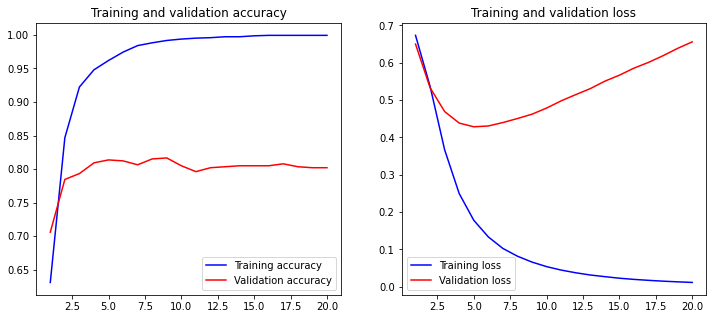

In [34]:
plot_history(history)

<span style="color:grey; font-size:1.2em">testons maintenant notre modèle avec une simple phrase 😃 <b>positive</b> </span>

In [35]:
# string pour le test
phrase = "boukhalef is a beautiful, calm and lovely place"

prediction_test = ANN_model.predict(vectorizer.transform([phrase]))
class_test = np.argmax(prediction_test)

print("Le Label prédite pour la phrase est: ",class_test)

Le Label prédite pour la phrase est:  1


<div id="word-embd">
        <h1 style="color:#1a1a1a">
         ⮞  Word Embedding
        </h1>
</div>


<span style="color:grey; font-size:1.2em">Le <b>Word Embedding</b> est une technique permet de représenter chaque mot d'un dictionnaire par un <b>vecteur de nombres réels</b>. Cette nouvelle représentation a ceci de particulier que les mots apparaissant dans des <b>contextes similaires</b> possèdent des vecteurs correspondants qui sont relativement <b>prochespositive</b>. </span>

<span style="color:grey; font-size:1.2em">Pour presenter des mots sous forme de vecteurs (ce qui est la manière courante d'utiliser le texte dans les réseaux de neurones) il y a deux façons possibles de représenter un mot sous forme de vecteur sont <b>One-hot encoding</b> et <b>Word embeddings</b>. </span>

<h4 style="font-size:1.2em">One-Hot Encoding</h4>

<span style="color:grey; font-size:1.2em">La première façon de représenter un mot sous forme de vecteur consiste à créer un One-Hot Encoding, qui se fait simplement en prenant un vecteur de la longueur du vocabulaire avec une entrée pour chaque mot du corpus.</span>

<h4 style="font-size:1.2em">Word embeddings</h4>

<span style="color:grey; font-size:1.2em">Cette méthode représente les mots sous forme de "dense word vectors" qui sont entraînés contrairement au dense One-Hot Encoding qui est codé en dur. Cela signifie que les intégrations de mots collectent plus d'informations dans moins de dimensions.</span>

<span style="color:grey; font-size:1.2em">Voice un example de Word Embedding sur l'un des reviews:</span>

<div id="cnn">
        <h1 style="color:#1a1a1a">
         ⮞  Réseau de Neurones convolutifs (CNN) avec Embedding
        </h1>
</div>

<span style="color:grey; font-size:1.2em"> Pour notre Réseaux de neurones convolutifs on va diviser notre jeu de données <b>80%</b> pour l'entraînement et <b>20%</b> pour le test, et pour la validation on prend <b>20%</b> des données d'entraînement</span>

In [36]:
sentences_train, sentences_val, y_train, y_val = train_test_split(sentences, y, test_size=0.2, random_state=1000)
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences_train, y_train, test_size=0.2, random_state=1000)

# definir notre tokenizer
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)

# tokenizer nos données
X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)
X_val = tokenizer.texts_to_sequences(sentences_val)

# la taille du vocabulaire
vocab_size = len(tokenizer.word_index) + 1
maxlen = 100

# transformer la forme des données
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
X_val = pad_sequences(X_val, padding='post', maxlen=maxlen)


In [37]:
#  créer un nouveau modèle
embedding_dim = 100
EMB_CNN = Sequential()

In [38]:
 # ajout des couches
EMB_CNN.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
EMB_CNN.add(layers.Conv1D(128, 5, activation='relu'))
EMB_CNN.add(layers.GlobalMaxPooling1D())
EMB_CNN.add(layers.Dense(10, activation='relu'))
EMB_CNN.add(layers.Dense(2, activation='softmax'))

In [39]:
# On choisit les paramètres du modèle
EMB_CNN.compile(loss='sparse_categorical_crossentropy',
                  optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07), 
                  metrics = ["accuracy"])

In [40]:
EMB_CNN.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          414900    
_________________________________________________________________
conv1d (Conv1D)              (None, 96, 128)           64128     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 22        
Total params: 480,340
Trainable params: 480,340
Non-trainable params: 0
_________________________________________________________________


In [41]:
history = EMB_CNN.fit(X_train, y_train,
                    epochs=20,
                    verbose=True,
                    validation_data=(X_val, y_val),
                    batch_size=10)

Epoch 1/20
176/176 [==============================] - 3s 15ms/step - loss: 0.6477 - accuracy: 0.6086 - val_loss: 0.5726 - val_accuracy: 0.6764
Epoch 2/20
176/176 [==============================] - 2s 14ms/step - loss: 0.3629 - accuracy: 0.8663 - val_loss: 0.4127 - val_accuracy: 0.8309
Epoch 3/20
176/176 [==============================] - 2s 14ms/step - loss: 0.1187 - accuracy: 0.9687 - val_loss: 0.4266 - val_accuracy: 0.8509
Epoch 4/20
176/176 [==============================] - 2s 14ms/step - loss: 0.0368 - accuracy: 0.9903 - val_loss: 0.5310 - val_accuracy: 0.8345
Epoch 5/20
176/176 [==============================] - 2s 14ms/step - loss: 0.0129 - accuracy: 0.9977 - val_loss: 0.5756 - val_accuracy: 0.8491
Epoch 6/20
176/176 [==============================] - 2s 14ms/step - loss: 0.0070 - accuracy: 0.9989 - val_loss: 0.6375 - val_accuracy: 0.8291
Epoch 7/20
176/176 [==============================] - 2s 14ms/step - loss: 0.0021 - accuracy: 0.9994 - val_loss: 0.6947 - val_accuracy: 0.8255

In [42]:
loss, accuracy = EMB_CNN.evaluate(X_train, y_train, verbose=False)
print("Accuracy sur les données d'entraînement est: {:.2f} %".format(accuracy*100))
loss, accuracy = EMB_CNN.evaluate(X_test, y_test, verbose=False)
print("Accuracy sur les données du test est: {:.2f} %".format(accuracy*100))

Accuracy sur les données d'entraînement est: 100.00 %
Accuracy sur les données du test est: 86.14 %


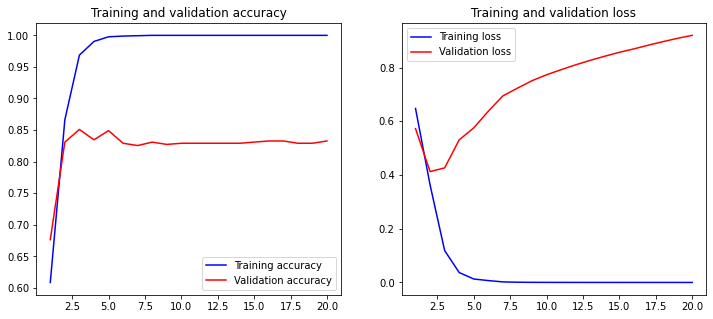

In [43]:
plot_history(history)

<span style="color:grey; font-size:1.2em">Encore une fois, nous avons atteint un meilleur score avec plus de couches pour notre <b>CNN</b></span>

<center id="demo">
        <h1 style="color:#1a1a1a;
                    font-size:2em">
        Une démo live 🧮
        </h1>
</center>

<span style="color:grey; font-size:1.2em">Enfin voici un champ de saisie en utilisant <b>ipywidgets, IPython.display</b> pour définir un widget et le contenu d'affichage aisnsi que l'input field. On utilise ce champ de saisie pour tester des phrases aléatoires de nos choix et obtenir une prediction et la certitude pour le Label.</span>

In [44]:
from ipywidgets import interact, widgets
from IPython.display import display, Markdown, Latex, clear_output

# définir les paramètres du widget
text = widgets.Text(
    value='',
    placeholder='type your description here',
    description='Description:',
    disabled=False
)
# affichage du text
display(text)

# appeler le widget
def callback(wdgt):
    clear_output()## Creating model
    display(text)
    # prendre la valeur d'input
    description = wdgt.value

    desc = tokenizer.texts_to_sequences([description])
    desc = pad_sequences(desc, padding='post', maxlen=maxlen)

    # faire une prediction sur la description
    prediction_test = EMB_CNN.predict(desc)
    
    # obtenir la classe du text
    class_test = np.argmax(prediction_test)

    # obtenir la certitude du prediction
    certainty = prediction_test[0][class_test]
    
    # mapper chaque class a une phrase correspondante
    result = 'positive 😃' if class_test == 1 else 'negative 😞'
    
    # afficher le resultat
    display(Markdown('La description: "{}" est  {:.2f} %   {}'.format(description,certainty*100,result)))

text.on_submit(callback)

Text(value='', description='Description:', placeholder='type your description here')

<center id="Conclusion">
        <h1 style="color:#1a1a1a;
                    font-size:2em">
        Conclusion 📌
        </h1>
</center>

<div style="color:grey; font-size:1.2em">Le travail que nous avons réalisé a consisté à exploirer le cycle de vie d'un project de Data Science en general et du Machine Learning et Deep Learning en particulier. On bien appris comment analyser et transformer les données, dans la partie du Pré-traitement on a diviser les données et vectoriser les phrases, et dernièrement la construction des modèles en essayant différentes approches: Modèles de base, les Réseaux de neurones artificiels et finalement les Réseau de Neurones convolutifs.
<br>
<br>
<span style="color:black; font-size:1.2em; background-color:#FFFFA6">Ce projet nous a permis d'acquérir les techniques d'utiliser des réseaux multi-couches pour l’analyse et prédire les sentiments</span>
</div>